In [1]:
import numpy as np
import pandas as pd

import datetime

notebook_start_time = datetime.datetime.now()
print(f"Notebook last run (end-to-end): {notebook_start_time}")

Notebook last run (end-to-end): 2025-02-04 19:48:29.940759


In [2]:
df = pd.read_csv("../data/high_diamond_ranked_10min.csv")
# From exploratory data analysis notebook
drop_columns = ['gameId', 'blueEliteMonsters', 'redEliteMonsters', 'redGoldDiff', 'redGoldDiff', 'redExperienceDiff', 'redFirstBlood', 'redDeaths', 'blueDeaths']
df = df.drop(columns=drop_columns)
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,11,0,0,0,17210,...,0,0,0,16567,6.8,17047,197,55,19.7,1656.7
1,0,12,1,0,5,5,0,0,0,14712,...,1,1,1,17620,6.8,17438,240,52,24.0,1762.0
2,0,15,0,0,7,4,1,0,0,16113,...,0,0,0,17285,6.8,17254,203,28,20.3,1728.5
3,0,43,1,0,4,5,0,1,0,15157,...,0,0,0,16478,7.0,17961,235,47,23.5,1647.8
4,0,75,4,0,6,6,0,0,0,16400,...,1,0,0,17404,7.0,18313,225,67,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,5,1,0,0,17765,...,0,0,0,15246,6.8,16498,229,34,22.9,1524.6
9875,1,54,0,0,6,8,1,0,0,16238,...,0,0,0,15456,7.0,18367,206,56,20.6,1545.6
9876,0,23,1,0,6,5,0,0,0,15903,...,1,0,0,18319,7.4,19909,261,60,26.1,1831.9
9877,0,14,4,1,2,3,1,0,0,14459,...,0,0,0,15298,7.2,18314,247,40,24.7,1529.8


## Train-Test Split

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['blueWins']
X = df.drop(columns=['blueWins'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_train_scaler.transform(X_train)

In [4]:
# perform principal component analysis
from sklearn.decomposition import PCA

# find the number of components that explain 95% of the variance
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

X_test_scaled = X_train_scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of components: {pca.n_components_}")

Number of components: 17


In [5]:
# analyze the explained variance
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.3039558 , 0.12147631, 0.07567488, 0.05392409, 0.04255016,
       0.04146192, 0.03987714, 0.03673008, 0.0362461 , 0.03409083,
       0.03280777, 0.02673937, 0.02584099, 0.02558343, 0.02376994,
       0.02116373, 0.01474826])

In [6]:
# analyze what each component represents
components = pd.DataFrame(pca.components_, columns=X.columns)
components.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0.008177,0.029407,0.121917,0.208551,0.172979,0.091835,0.058267,0.092413,0.261070,0.228827,...,-0.094082,-0.061419,-0.087167,-0.256694,-0.228440,-0.245972,-0.158476,-0.065555,-0.158476,-0.256694
1,0.007952,-0.038285,0.007545,0.319290,0.289742,-0.006772,-0.002892,0.086757,0.208212,-0.103389,...,-0.040416,-0.006217,0.071834,0.215563,-0.093666,-0.109339,-0.281295,-0.166021,-0.281295,0.215563
2,0.021401,0.044918,-0.007744,0.174111,0.142202,-0.013726,0.047714,0.048177,0.256747,0.313152,...,0.055893,0.037918,0.040272,0.261200,0.311016,0.318911,0.200196,0.168297,0.200196,0.261200
3,-0.068306,-0.034168,-0.093669,-0.079802,-0.138529,-0.564937,0.123745,0.139922,-0.000326,-0.004748,...,0.566746,-0.078505,-0.104667,-0.020749,-0.023215,-0.032407,-0.252084,0.160272,-0.252084,-0.020749
4,-0.116280,-0.130867,0.209419,0.119938,0.180936,-0.102244,-0.413197,-0.092858,0.053128,-0.039179,...,0.106047,0.465400,0.219582,-0.048724,0.065496,0.075178,-0.012931,0.375293,-0.012931,-0.048724


In [7]:
for i in range(pca.n_components_):
    print(f"Component {i}")
    print(components.iloc[i].sort_values(ascending=False))
    print()

Component 0
blueGoldDiff                    0.319470
blueExperienceDiff              0.307842
blueTotalGold                   0.261070
blueGoldPerMin                  0.261070
blueTotalExperience             0.246783
blueAvgLevel                    0.228827
blueKills                       0.208551
blueAssists                     0.172979
blueTotalMinionsKilled          0.158226
blueCSPerMin                    0.158226
blueFirstBlood                  0.121917
blueTowersDestroyed             0.092413
blueDragons                     0.091835
blueTotalJungleMinionsKilled    0.067119
blueHeralds                     0.058267
blueWardsDestroyed              0.029407
blueWardsPlaced                 0.008177
redWardsPlaced                 -0.006298
redWardsDestroyed              -0.035993
redHeralds                     -0.061419
redTotalJungleMinionsKilled    -0.065555
redTowersDestroyed             -0.087167
redDragons                     -0.094082
redCSPerMin                    -0.158476
redT

## Interpretations of Principal Components

**Component 0** seems to be relative resources (gold diff and experience diff) and absolute resources (blue total gold, blue gold per min, blue total experience, and blue average level) with some smaller coefficients for other stats. Notably it has low correlation with dragons, heralds, jungle monsters, etc, and a moderate negative correlation with red team assists, kills, average level, total experience, gold per min, and total gold. Seems to be a **rough proxy for team lead**.

**Component 1** cares about how many kills and assists were on both teams, but stats about how much absolute gold each team had. Coefficients drop off steeply, and seems to have moderate negative correlation with jungle stats and minions. Seems to very clearly be representing **how much kill gold each team has.**

**Component 2** measures total experience and average level, with some info on absolute gold and how many minions have been killed. Seems to care a tiny amount about assists and jungle minions. Since all correlations are positive, it **might be overall level and resources available to *both* teams.**

**Component 3** has the strongest absolute correlations seen so far with how many dragons the red team has taken (+0.56) and how many dragons the blue team has taken (-0.56); note that these are the same numbers with the sign flipped. Slight positive correlation with blue minion features and slight negative correlation with red minion features (with opposite signs from their team's dragon features). Seems to clearly represent **which team gets an early dragon**; reversed correlation with minions may indicate that **if teams are not taking minions, they may be angling for an early dragon.**

**Component 4** is clearly related to which team got the herald, and we see the same pattern as with component 3: redHerald (+0.465) and blueHerald (-4.13), with moderate affinity for red jungle minions killed. Slight affinity for how many towers the red team has destroyed and how many assists and kills the blue team has. Not sure about those low correlations, or why redWardsDestroyed has a moderate negative coefficient, but this seems to be **which team gets the herald**.

**Component 5** is weird because it cares about how many wards the blue team has destroyed, which exploratory data analysis has indicated matters very little. It also has blue cs per minute and blue total minions killed, and *red* team heralds, so this **may roughly indicate how well the blue bot lane is doing** (although we would expect maybe a stronger correlation with blue dragons than .155, but component 3 may be monopolizing that). Because it ranks blue wards destroyed so highly, this may be where we start getting diminishing returns.

**Component 6** is another one that cares about wards, this time both team's wards. Despite a strong negative affinity for blue total jungle minions and other features, this is likely **vision control**.

**Component 7** cares about how may red jungle minions are killed and whether blue got a first blood and early dragon, and is negatively correlated with how many towers the red team destroyed. This seems to correlate with **the red team's early jungle presence**.

**Component 8** screams about structures, with blue towers destroyed at .627 and red towers destroyed at .497, followed by blue heralds at .47 and red heralds at .20. Considering that heralds are used to destroy towers and that all other correlations are small, this is obviously **how many towers are destroyed by both teams**.

### Summary and Comments

There are some strong correlations in later principal components, but by this point we are unlikely to use more principal components especially when so many seem to care about vision and warding. I'm surprised that component 8 was so low, when our exploratory data analysis indicated that stomps mostly correlated with towers being destroyed. Components 0, 1, and 2 are unsurprising because they care about metrics most closely correlated with win rate.

## Models: Logistic Regression, LDA, KNN, SVC, Random Forest 

In [8]:
from dataclasses import dataclass, field
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

@dataclass
class ModelData:
    model: object
    accuracies: list = field(default_factory=lambda: [])
    max_accuracy: float = -float('inf')
    number_of_PCs: int = None

models = {
    "Logistic Regression": ModelData(LogisticRegression()),
    "LDA": ModelData(LinearDiscriminantAnalysis()),
    "KNN": ModelData(KNeighborsClassifier()),
    "SVM": ModelData(SVC()),
    "Random Forest": ModelData(RandomForestClassifier())
    # We want to tweak a hyperparameter for QDA, so we'll do that separately
}

for name, model_data in models.items():
    print(f"Now training {name} model...", end=" ")
    start_time = datetime.datetime.now()
    for i in range(1, pca.n_components_ + 1):
        model_data.model.fit(X_train_pca[:, :i+1], y_train)
        score = model_data.model.score(pca.transform(X_test_scaled)[:, :i+1], y_test)
        model_data.accuracies.append(score)
        if score > model_data.max_accuracy:
            model_data.max_accuracy = score
            model_data.number_of_PCs = i
    print(f"done ({datetime.datetime.now() - start_time}) and max accuracy of {model_data.max_accuracy:.3f} achieved with {model_data.number_of_PCs} PCs")

Now training Logistic Regression model... done (0:00:00.104443) and max accuracy of 0.736 achieved with 4 PCs
Now training LDA model... done (0:00:00.110378) and max accuracy of 0.736 achieved with 4 PCs
Now training KNN model... done (0:00:01.765473) and max accuracy of 0.696 achieved with 6 PCs
Now training SVM model... done (0:00:34.298692) and max accuracy of 0.728 achieved with 4 PCs
Now training Random Forest model... done (0:00:43.470091) and max accuracy of 0.722 achieved with 11 PCs


## Model: Quadratic Discriminant Analysis

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Changing regularization parameter helped improve the accuracy of the model before PCA, maybe it will after PCA as well
x = np.arange(1, pca.n_components_ + 1)
y = np.arange(0, 1, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.zeros((10, pca.n_components_))

QDA_max_accuracy = 0
QDA_max_accuracy_params = (0, 0)

for i in range(1, pca.n_components_ + 1):
    for j in range(0, 10):
        qda = QuadraticDiscriminantAnalysis(reg_param=j/10)
        qda.fit(X_train_pca[:, :i+1], y_train)
        qda_accuracy = accuracy_score(y_test, qda.predict(X_test_pca[:, :i+1]))
        Z[j, i - 1] = qda_accuracy
        if qda_accuracy > QDA_max_accuracy:
            QDA_max_accuracy = qda_accuracy
            QDA_max_accuracy_params = (i, j/10)

## Graphing Results, Choosing Number of Principal Components

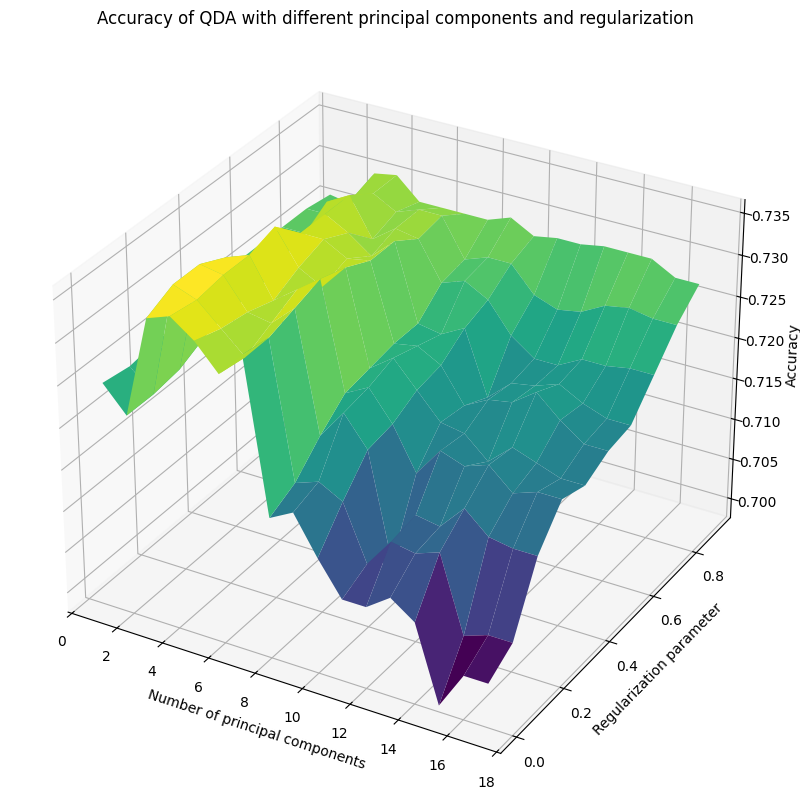

In [10]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(10, 10)

ax.set_title("Accuracy of QDA with different principal components and regularization")
ax.set_xlabel("Number of principal components")
ax.set_ylabel("Regularization parameter")
ax.set_zlabel("Accuracy")
# zorder isn't working for some reason
# ax.scatter(max_accuracy_params[0], max_accuracy_params[1], max_accuracy, 'b.', s=5000, color='r', zorder=2.5)
ax.plot_surface(X, Y, Z, cmap='viridis', zorder=1)
plt.show()

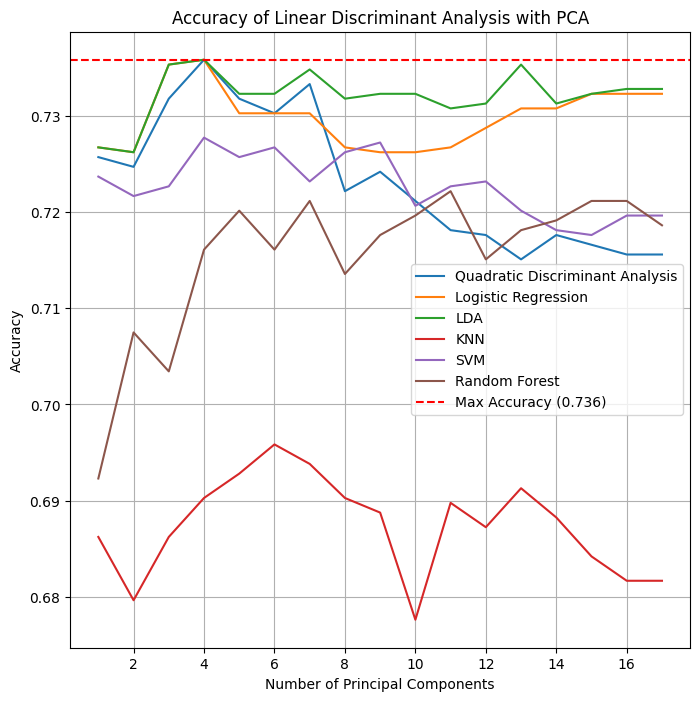

In [11]:
fig = plt.figure()
fig.set_size_inches(8, 8)

plt.plot(range(1, pca.n_components_+1), Z[QDA_max_accuracy_params[0]], label="Quadratic Discriminant Analysis")
for name, model_data in models.items():
    plt.plot(range(1, pca.n_components_+1), model_data.accuracies, label=name)
plt.grid()
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Accuracy of Linear Discriminant Analysis with PCA")

# plot horizontal line for max accuracy
max_accuracy = max([model_data.max_accuracy for model_data in models.values()] + [QDA_max_accuracy])
plt.axhline(max_accuracy, color='r', linestyle='--', label=f"Max Accuracy ({max_accuracy:.3f})")
plt.legend()
plt.show()

The jury is in: **5 principal components** seem to be the most accurate, and linear & quadratic discriminant analysis and logistic regression seemed to **all cap out around 0.735 accuracy**. The support vector machine had the **greatest accuracy increase** between non-PCA and PCA training, but still performed slightly worse than the aforementioned models. Random forest had a notable spike at 9 PCs, but also performed worse than the top models and needed more PCs. K-nearest neighbors was outperformed by every other model for every number of PCs, so it is not competitive. This likely means that **parametric models** will easily outperform nonparametric models in this problem.

## Models: Neural Networks

In [12]:
# Neural network on 5 principal components
import tensorflow as tf

num_principal_components = 5

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

epochs = 100

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
history_1 = model_1.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_1.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

2025-02-04 19:49:51.888075: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 19:49:51.899539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738716591.911547   78026 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738716591.915071   78026 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 19:49:51.928296: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Epoch 1/100


2025-02-04 19:49:53.057117: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6564 - loss: 0.6209
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.5383
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7328 - loss: 0.5329
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7307 - loss: 0.5311
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7339 - loss: 0.5293
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7274 - loss: 0.5300
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7357 - loss: 0.5266
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7346 - loss: 0.5248
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7388 - loss: 0.5166
Epoch 10/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7332 - loss: 0.5331
Epoch 11/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7276 - loss: 0.5365
Epoch 12/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

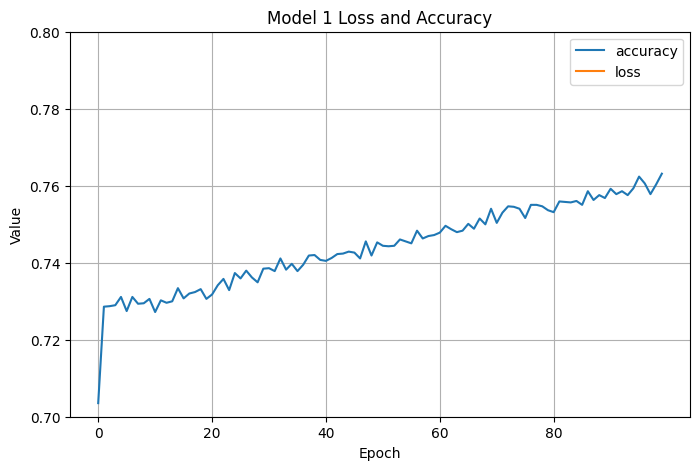

In [13]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.7, 0.8)
plt.title("Model 1 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

In [14]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# triple epochs
epochs = 300

# double learning rate
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history_2 = model_2.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_2.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

Epoch 1/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6729 - loss: 0.5912
Epoch 2/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7258 - loss: 0.5415
Epoch 3/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7310 - loss: 0.5288
Epoch 4/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7342 - loss: 0.5295
Epoch 5/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7174 - loss: 0.5418
Epoch 6/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 0.5344
Epoch 7/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7309 - loss: 0.5275
Epoch 8/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7289 - loss: 0.5277
Epoch 9/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7287 - loss: 0.5327
Epoch 10/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7357 - loss: 0.5273
Epoch 11/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7343 - loss: 0.5271
Epoch 12/300
247/247 ━━━━━━━━━━━━━━━━━━━━

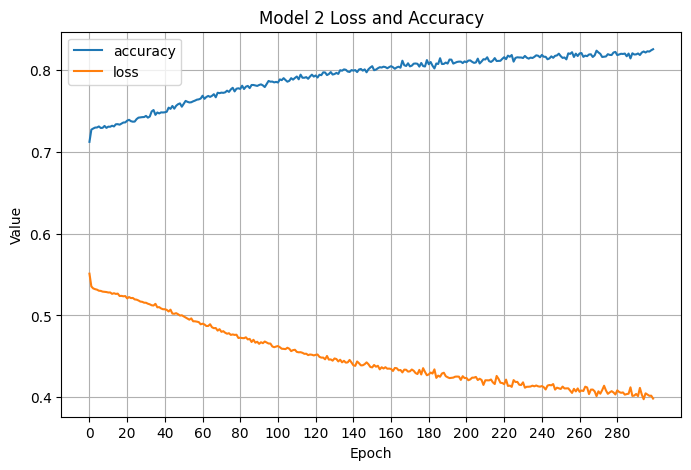

In [15]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model 2 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

In [16]:
# make the model deeper
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history_3 = model_3.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_3.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

Epoch 1/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6861 - loss: 0.5912
Epoch 2/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 0.5323
Epoch 3/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7414 - loss: 0.5248
Epoch 4/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7312 - loss: 0.5316
Epoch 5/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7244 - loss: 0.5442
Epoch 6/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7207 - loss: 0.5420
Epoch 7/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7280 - loss: 0.5328
Epoch 8/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7247 - loss: 0.5339
Epoch 9/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7176 - loss: 0.5393
Epoch 10/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7290 - loss: 0.5318
Epoch 11/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7384 - loss: 0.5245
Epoch 12/300
247/247 ━━━━━━━━━━━━━━━━━━━━

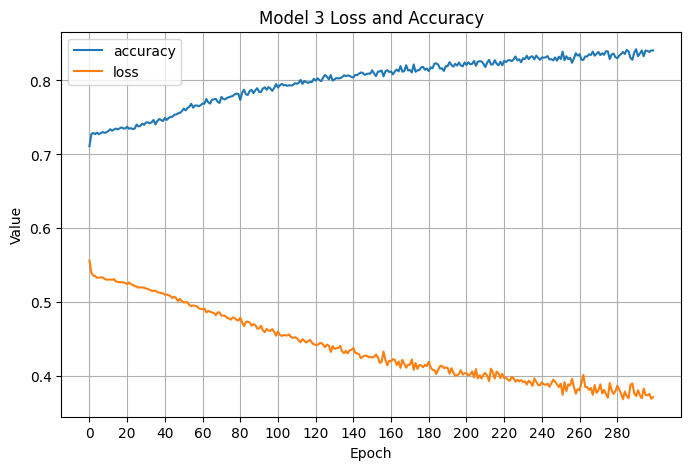

In [17]:
# still can't get back above 71% accuracy!
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model 3 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

The discrepancies between the neural net accuracy during training and the accuracy when evaluating against the test set clearly indicates overfitting, but this overfitting interestingly enough does not harm accuracy. Also interesting is that training the neural network on 5 principal components, rather than the data set, resulted in a fit that was about 1-2% worse. The neural network probably would have gotten a better fit with one or two additional principal components.

In [18]:
# Go back to original neural network, train on 6 principal components
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

num_principal_components = 6

epochs = 100

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
history_4 = model_4.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_4.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6242 - loss: 0.6302
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7224 - loss: 0.5403
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7205 - loss: 0.5435
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7260 - loss: 0.5386
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7374 - loss: 0.5204
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 0.5287
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7360 - loss: 0.5229
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7363 - loss: 0.5233
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7325 - loss: 0.5268
Epoch 10/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7280 - loss: 0.5333
Epoch 11/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7342 - loss: 0.5329
Epoch 12/100
247/247 ━━━━━━━━━━━━━━━━━━━━

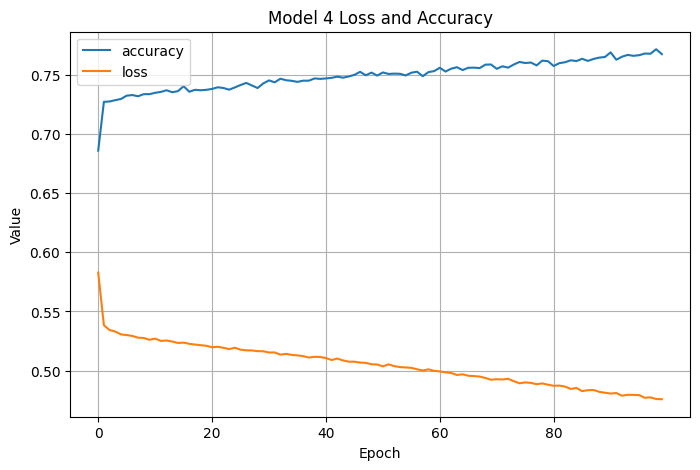

In [19]:
# accuracy went down!
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model 4 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

In [20]:
# Go back to original neural network, train on 6 principal components
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

num_principal_components = 7

epochs = 100

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
history_5 = model_5.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_5.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6563 - loss: 0.6135
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7356 - loss: 0.5336
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7196 - loss: 0.5468
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7330 - loss: 0.5297
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7240 - loss: 0.5361
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7348 - loss: 0.5284
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7392 - loss: 0.5213
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7247 - loss: 0.5321
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7370 - loss: 0.5251
Epoch 10/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7317 - loss: 0.5255
Epoch 11/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7241 - loss: 0.5319
Epoch 12/100
247/247 ━━━━━━━━━━━━━━━━━━━━

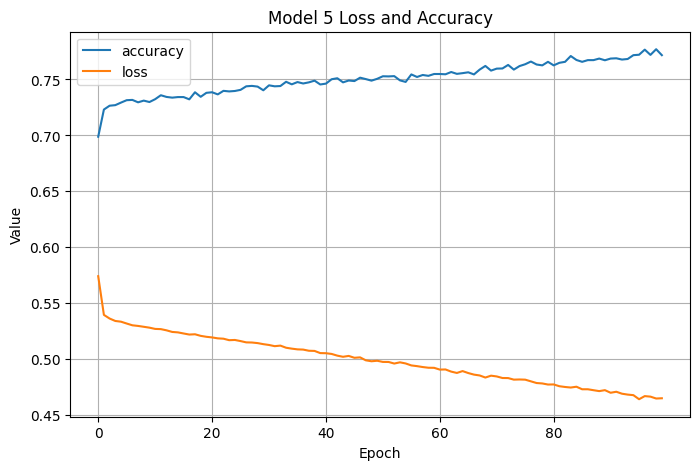

In [21]:
# accuracy is still not as good as the original model
pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model 5 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

In [22]:
notebook_end_time = datetime.datetime.now()
print(f"Notebook last run (end-to-end): {notebook_end_time} (duration: {notebook_end_time - notebook_start_time})")

Notebook last run (end-to-end): 2025-02-04 19:56:04.773560 (duration: 0:07:34.832801)
